In [1]:
import numpy as np
from scipy.fftpack import dct
from scipy.stats import entropy

import skimage.external.tifffile as tif
import matplotlib.pyplot as plt
from glob import glob
import os
%matplotlib inline

In [2]:
def imQual(im):
    return entropy(dct(im).ravel()**2)

def volQual(vol):    
    return np.array([imQual(z) for z in vol])

In [3]:
homeDir = '/tier2/ahrens/davis/scratch/imqual/20160106/'

In [4]:
im_paths = glob(homeDir + '*/TM*/TM*.tif')
ims = np.array([tif.imread(path) for path in im_paths])

In [5]:
quals = np.zeros([len(im_paths), ims.shape[1]])

for ind in range(len(im_paths)):
    quals[ind] = volQual(ims[ind][:,:,:])

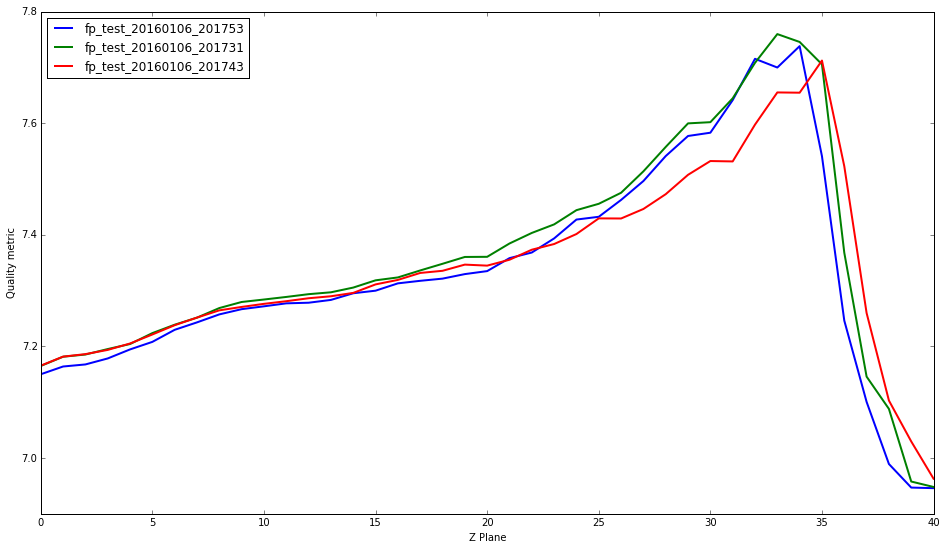

In [7]:
plt.figure(figsize=(16,9))
for ind,qual in enumerate(quals):
    plt.plot(qual, linewidth=2, label=im_paths[ind].split(os.path.sep)[-3])
plt.ylabel('Quality metric')
plt.xlabel('Z Plane')
plt.legend(loc=0)

## Testing on binary disk image with varying levels of blur. Image quality should decrease with blur.

CPU times: user 619 ms, sys: 241 ms, total: 860 ms
Wall time: 731 ms


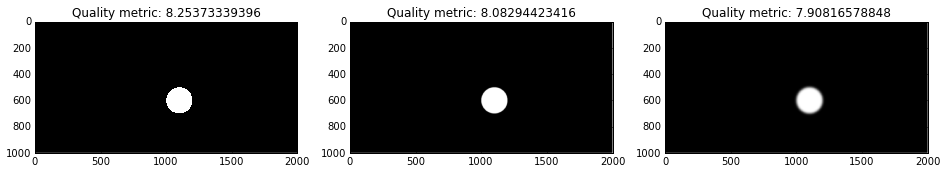

In [8]:
%%time
import skimage.filters as filt
import skimage.morphology as morph

dims = [1000,2000]
tmp = np.random.randint(100,200,dims).astype('float64')
tmp = np.zeros(dims)
cell = morph.disk(100)
tmp[np.ix_(dims[0] / 2 +np.arange(cell.shape[0]),dims[1] / 2 +np.arange(cell.shape[1]))] = cell
sigma = 3
testIms = [tmp, filt.gaussian_filter(tmp,sigma=sigma), filt.gaussian_filter(tmp,sigma=3*sigma)]

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(testIms[0], interpolation='None', cmap='gray')
plt.title('Quality metric: {0}'.format(imQual(testIms[0])))

plt.subplot(132)
plt.imshow(testIms[1], interpolation='None', cmap='gray')
plt.title('Quality metric: {0}'.format(imQual(testIms[1])))

plt.subplot(133)
plt.imshow(testIms[2], interpolation='None', cmap='gray')
plt.title('Quality metric: {0}'.format(imQual(testIms[2])))
